# Исследование данных о сервисе GoFast

Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.

Сервисом можно пользоваться:

**без подписки**

   * абонентская плата отсутствует;
   * стоимость одной минуты поездки — 8 рублей;
   * стоимость старта (начала поездки) — 50 рублей;
   
**с подпиской Ultra**

   * абонентская плата — 199 рублей в месяц;
   * стоимость одной минуты поездки — 6 рублей;
   * стоимость старта — бесплатно.

**Цели исследования:**
* Проанализировать данные 
* Проверить гипотезы
* Предобработать данные
* Описать и визуализировать общую информацию о пользователях и поездках
* Обединить данные
* Подсчитать выручку
* Провести распределения



**Таким образом, исследование пройдёт в семь этапов:**
1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчёт выручки
6. Проверка гипотез
7. Распределения

### Загрузка данных

#### Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats as st

In [3]:
try:
    
    df_users = pd.read_csv('users_go.csv')
    df_rides = pd.read_csv('rides_go.csv')
    df_subscriptions = pd.read_csv('subscriptions_go.csv')
    
except:
    
    df_users = pd.read_csv('/datasets/users_go.csv')
    df_rides = pd.read_csv('/datasets/rides_go.csv')
    df_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

#### Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.

In [4]:
df_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [5]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


#### ***Пользователи — users_go.csv:***

**user_id** - уникальный идентификатор пользователя

**name** - имя пользователя

**age** - возраст

**city** - город

**subscription_type** - тип подписки (free, ultra)

In [6]:
df_rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [7]:
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


#### ***Поездки — rides_go.csv:***

**user_id** - уникальный идентификатор пользователя

**distance** - расстояние, которое пользователь проехал в текущей сессии (в метрах)

**duration** - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»

**date** - дата совершения поездки

In [8]:
df_subscriptions.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [9]:
df_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


#### ***Подписки — subscriptions_go.csv:***

**subscription_type** - тип подписки

**minute_price** - стоимость одной минуты поездки по данной подписке

**start_ride_price** - стоимость начала поездки

**subscription_fee** - стоимость ежемесячного платежа

**Вывод:**

Создано три датафрейма: 

*df_users* из файла users_go.csv с описанием пользователей 

*df_rides* из файла rides_go.csv с описанием поездок 

*df_subscriptions* из файла subscriptions_go.csv с описанием подписок 

Первично изучив данные можно сказать, что всего имеем 19 635 записи.

### Предобработка данных

#### Приведите столбец date к типу даты pandas.

In [10]:
df_rides['date'] = pd.to_datetime(df_rides['date'], format='%Y-%m-%d')
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [11]:
min(df_rides['date'])

Timestamp('2021-01-01 00:00:00')

In [12]:
max(df_rides['date'])

Timestamp('2021-12-30 00:00:00')

*Имеем данные за весь период 2021 года.*

#### Создайте новый столбец с номером месяца на основе столбца date.

In [13]:
df_rides['month'] = df_rides['date'].dt.month
df_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


#### Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

**Пропущенные значения и дубликаты в df_users**

In [14]:
df_users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

*Пропущенных значений в df_users не обнаружено*

*В данном датафреме повторяющиеся неявные значения могуут быть только в таблице с городом, проверим его*

In [15]:
df_users['city'].sort_values().unique()

array(['Екатеринбург', 'Краснодар', 'Москва', 'Омск', 'Пятигорск',
       'Ростов-на-Дону', 'Сочи', 'Тюмень'], dtype=object)

*Неявных дубликатов в df_users не обнаружено*

In [16]:
df_users.duplicated().sum()

31

*Присутствует 31 дубликат, удалим*

In [17]:
df_users.drop_duplicates(inplace=True)

In [18]:
df_users.duplicated().sum()

0

*Явные дубликаты удалены*

**Пропущенные значения и дубликаты в df_rides**

In [19]:
df_rides.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

*Пропущенных значений в df_rides не обнаружено*

In [20]:
df_rides['user_id'].sort_values().unique()

array([   1,    2,    3, ..., 1532, 1533, 1534])

In [21]:
df_rides.duplicated().sum()

0

*Явных и неявных дубликатов не обнаружено*

**Пропущенные значения и дубликаты в df_subscriptions**

In [22]:
df_subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

*Пропущенных значений в df_subscriptions не обнаружено*

In [23]:
df_subscriptions.duplicated().sum()

0

*Дубликатов не обнаружено*

**Вывод:**

Столбец date приведён к типу даты pandas. Создан новый столбец с номером месяца. Проверены все датафреймы на наличие пропущенных значений и дубликатов.

### Исследовательский анализ данных

#### Частота встречаемости городов

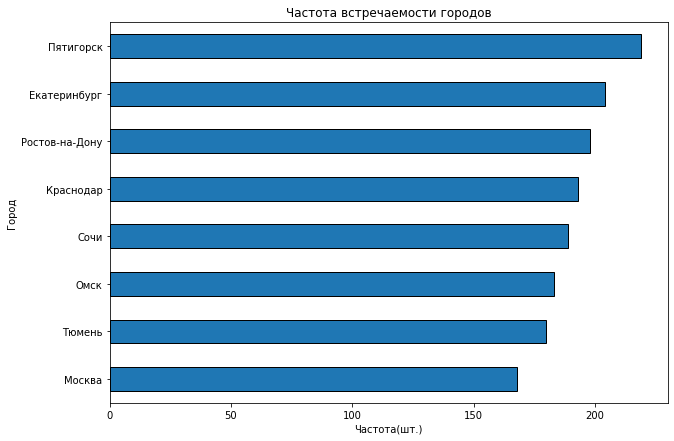

In [24]:
(df_users['city']
    .value_counts(ascending= True)
    .plot(kind='barh', figsize=(10, 7), ec='black'))

plt.title('Частота встречаемости городов')
plt.xlabel('Частота(шт.)')
plt.ylabel('Город')
plt.show()

*По графику видно, что Пятигигорск встречается чаще всего, хотя из всего списка он является городом с самым низким количеством населения(144 955 чел.). Это можно объяснить тем, что сервис GoFast является единсвенным сервисом проката самокатов в городе, поэтому там его испольуют чаще, чем в других городах.*

#### Соотношение пользователей с подпиской и без подписки

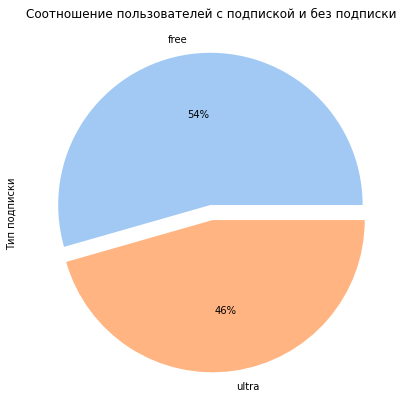

In [26]:
(df_users['subscription_type']
    .value_counts()
    .plot(kind='pie', y='Тип подписки',figsize=(10, 7), autopct='%1.0f%%',explode = (0.05, 0.05),colors = sns.color_palette('pastel')[ 0:2 ]))

plt.title('Соотношение пользователей с подпиской и без подписки')
plt.ylabel('Тип подписки')
plt.show()

*Пользователей без подписки больше чем пользователей с подпиской. Это можно объяснить тем, что большинство пользователей не так часто пользуются сервисом и потребность в подписке отсутсвует. Или они просто считают, что подписка не так выгодна.*

#### Возраст пользователей

In [25]:
df_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

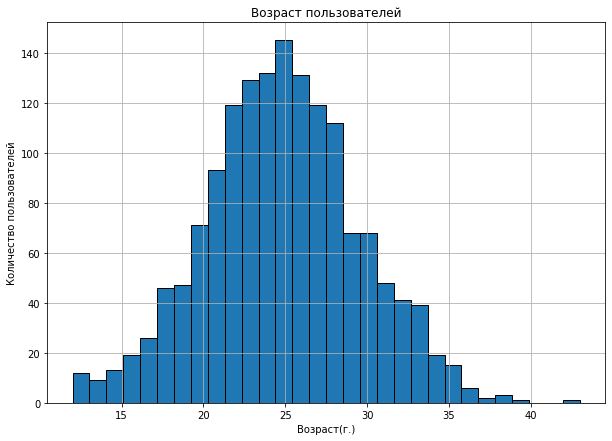

In [26]:
df_users.hist('age',bins=30, figsize=(10, 7), ec='black')

plt.title('Возраст пользователей')
plt.xlabel('Возраст(г.)')
plt.ylabel('Количество пользователей')
plt.show()

*По графику видно, что чаще всего встречаются пользователи от 22 до 28 лет. Возраст ниже 15 можно принять как неверное обозначение даты рождения при регистрации*

#### Расстояние, которое пользователь преодолел за одну поездку

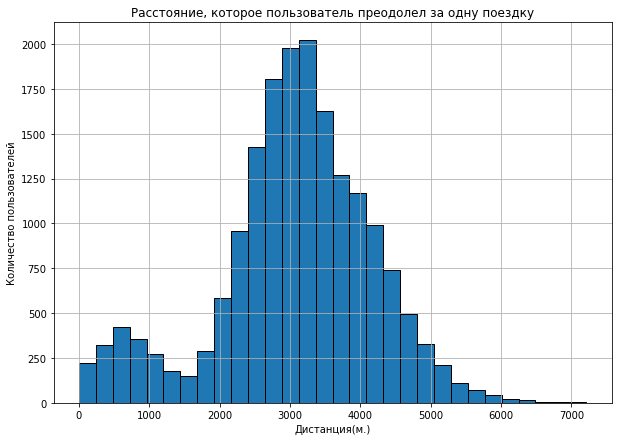

In [27]:
df_rides.hist('distance',bins=30, figsize=(10, 7), ec='black')

plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Дистанция(м.)')
plt.ylabel('Количество пользователей')
plt.show()

*Чаще всего совершаются поездки от 2500 до 4200 метров. Пиковые значения возможно связаны с тем, что пользователи берут самокаты чтобы доехать до нужной точки, которая расположена не так далеко. Это и дешевле чем такси и быстрее чем транспорт. Малый пик может означать что это поездки совершенные пользователями"на пробу" узнать что такое самокат и прочее.*

#### Продолжительность поездок

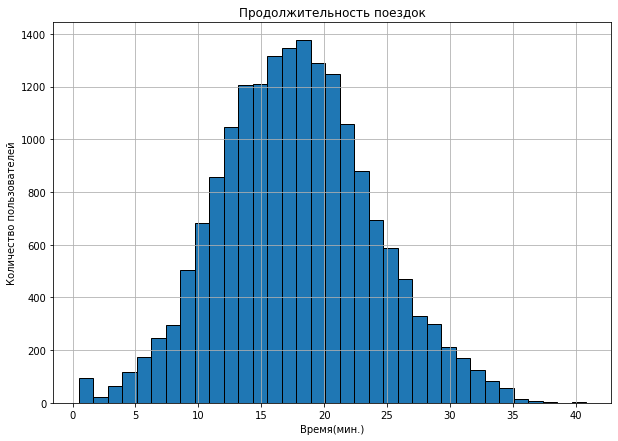

In [28]:
df_rides.hist('duration',bins=35, figsize=(10, 7), ec='black')

plt.title('Продолжительность поездок')
plt.xlabel('Время(мин.)')
plt.ylabel('Количество пользователей')
plt.show()

*Чаще встречаются поездки от 10 до 25 минут, что в принципе совпадает с расстоянием поездок. Присутсвует пик у нуля, проверим на выбросы.*

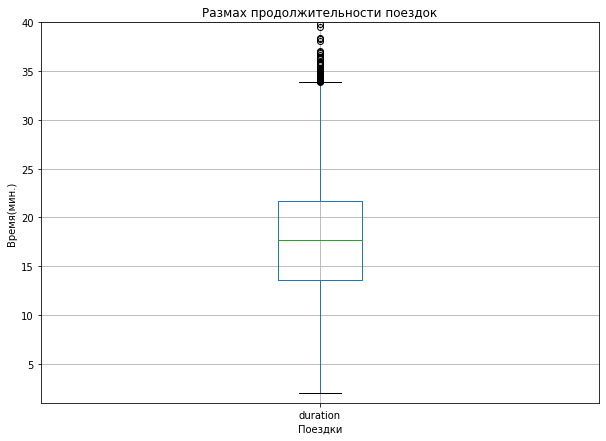

In [29]:
df_rides.boxplot(column='duration', figsize=(10, 7))
plt.title('Размах продолжительности поездок')
plt.ylim(1, 40)
plt.ylabel('Время(мин.)')
plt.xlabel('Поездки')
plt.show()


*Значения у нуля не являются выбросами. Либо это поездки завершенные по технической ошибке. Либо, что более вероятно, поездки с фиксированной стоимостью, где цена идет в целом за расстояние до точки, а не за минуты.*

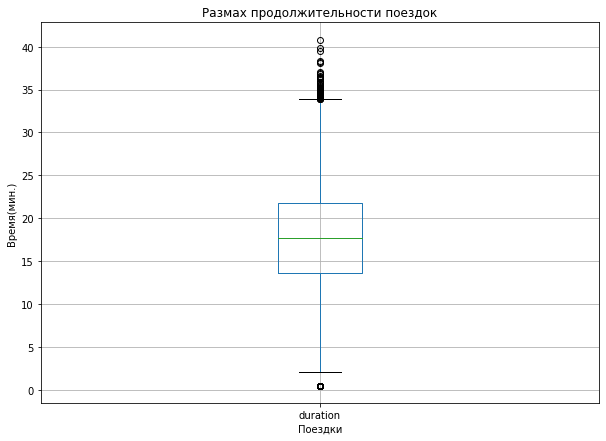

In [46]:
# код ревьюера
df_rides.boxplot(column='duration', figsize=(10, 7))
plt.title('Размах продолжительности поездок')
# plt.ylim(1, 40)
plt.ylabel('Время(мин.)')
plt.xlabel('Поездки')
plt.show()

**Вывод:** 

Визуализирована и описана общая информация о пользователях и поездках. 

Чаще всего встречаются поездки из Пятигорска, расстоянием от 2500 до 4200 метров и продолжтельностью от 10 до 25 минут, совершенные пользователями от 22 до 28 лет, которые не имеют подписки на сервис.

### Объединение данных

#### Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().

In [30]:
df = df_users.merge(df_rides, on='user_id')
df_all = df.merge(df_subscriptions, on='subscription_type')
display(df_all)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [31]:
len(df_all) #количество строк в полученном датафрейме

18068

In [32]:
len(df_rides) #количество строк в датафрейме поездок

18068

*Объединение прошло успешно, данные не потеряны*

#### Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1

*c данными о пользователях без подписки*

In [33]:
df_free = df_all.query('subscription_type == "free"')
display(df_free)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


*с данными о пользователях с подпиской*

In [34]:
df_ultra = df_all.query('subscription_type == "ultra"')
display(df_ultra)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


#### 4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.

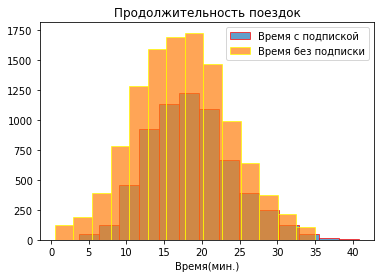

In [35]:
plt.hist(df_ultra['duration'], label='Время с подпиской', bins=14, alpha=.7, edgecolor='red')
 
plt.hist(df_free['duration'], label="Время без подписки", bins=14, alpha=.7, edgecolor='yellow')

plt.legend()

plt.title('Продолжительность поездок')
plt.xlabel('Время(мин.)')
plt.show()

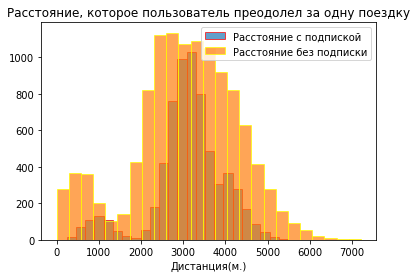

In [36]:
plt.hist(df_ultra['distance'], label='Расстояние с подпиской', bins=25, alpha=.7, edgecolor='red')
 
plt.hist(df_free['distance'], label="Расстояние без подписки", bins=25, alpha=.7, edgecolor='yellow')

plt.legend()
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Дистанция(м.)')
plt.show()

*Можно заметить, что пользователи с подпиской и без совершают поездки с примерно похожим расстоянием и временем, только в разных количествах.*

**Вывод:**

Объединены данные о пользователях, поездках и подписках в один датафрейм df_all. Так же на основе этого датафрейма созданы два отдельных датафрейма с данными о пользователях без подписки df_free и с данными о пользоватеях с подпиской df_ultra.

Так же визуализирована информация о расстоянии и времени поездок обеих категорий пользователей.

### Подсчёт выручки

#### Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [37]:
df_all['duration'] = np.ceil(df_all['duration']) 

agg_df = df_all.pivot_table(index=['user_id', 'month','minute_price','start_ride_price','subscription_fee'], values = ['distance', 'duration', 'name', 'subscription_type'], aggfunc={'distance':'sum', 'duration':'sum', 'name':'count', 'subscription_type': 'min',})
agg_df.columns = ['total_distance', 'total_duration', 'trip_count', 'subscription_type']
agg_df = agg_df.reset_index() 

display(agg_df)

,user_id,month,minute_price,start_ride_price,subscription_fee,total_distance,total_duration,trip_count,subscription_type
0,1,1,6,0,199,7027.511294,42.0,2,ultra
1,1,4,6,0,199,754.159807,7.0,1,ultra
2,1,8,6,0,199,6723.470560,46.0,2,ultra
3,1,10,6,0,199,5809.911100,32.0,2,ultra
4,1,11,6,0,199,7003.499363,56.0,3,ultra
...,...,...,...,...,...,...,...,...,...
11326,1534,6,8,50,0,3409.468534,26.0,2,free
11327,1534,8,8,50,0,7622.453034,48.0,2,free
11328,1534,9,8,50,0,4928.173852,23.0,1,free
11329,1534,11,8,50,0,13350.015305,78.0,4,free


#### В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

In [38]:
agg_df['total_income']=agg_df['minute_price']*agg_df['total_duration']+ agg_df['start_ride_price']*agg_df['trip_count']+agg_df['subscription_fee']
display(agg_df)

,user_id,month,minute_price,start_ride_price,subscription_fee,total_distance,total_duration,trip_count,subscription_type,total_income
0,1,1,6,0,199,7027.511294,42.0,2,ultra,451.0
1,1,4,6,0,199,754.159807,7.0,1,ultra,241.0
2,1,8,6,0,199,6723.470560,46.0,2,ultra,475.0
3,1,10,6,0,199,5809.911100,32.0,2,ultra,391.0
4,1,11,6,0,199,7003.499363,56.0,3,ultra,535.0
...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,8,50,0,3409.468534,26.0,2,free,308.0
11327,1534,8,8,50,0,7622.453034,48.0,2,free,484.0
11328,1534,9,8,50,0,4928.173852,23.0,1,free,234.0
11329,1534,11,8,50,0,13350.015305,78.0,4,free,824.0


In [39]:
#def get(row):
    #subscription_type = row['subscription_type']
    #total_duration = row['total_duration']
    #trip_count=row['trip_count']
    
    #if subscription_type == 'ultra':
        #return 6*total_duration+199
    #elif subscription_type == 'free':
        #return 8*total_duration+ 50*trip_count
    
#agg_df['total_income'] = agg_df.apply(get, axis=1)

**Вывод:**

Создан датафрейм agg_df с объдинёнными данными о поездках на основе датафрема df_all. Найдено общее расстояние, количество поездок и время для каждого пользователя. Добавлен в этот датафрейм новый столбец с помесячной выручкой за каждого ползователя.

### Проверка гипотез

#### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

**Нулевая гипотеза:** Время поездок пользователей с подпиской "Ultra" такое же как и пользователей без подписки.
**Альтернативная гипотеза:** Время пооездок пользователей с подпиской "Ultra" больше чем у пользователей без подписки.

In [40]:
ultra1= df_ultra['duration']
free1= df_free['duration']

alpha = 0.05 

results = st.ttest_ind(ultra1, free1, alternative='greater')

print(results.pvalue)
 
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

1.2804098316645618e-34
Отвергаем нулевую гипотезу


In [41]:
print("Средняя продолжительность для пользователей без подписки:", free1.mean())
print("Средняя продолжительность для пользователей с подпиской:", ultra1.mean())

Средняя продолжительность для пользователей без подписки: 17.39090929866399
Средняя продолжительность для пользователей с подпиской: 18.54198516280583


*Нулевая гипотеза  отвергнута, а это значит, что пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки. Можно сделать вывод, что пользователи с подпиской "выгоднее" для сервиса.*

#### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

**Нулевая гипотеза:** Расстояние за одну поездку пользователей с подпиской "Ultra" не привышает 3130 метров.

**Альтернативная гипотеза:**  Расстояние за одну поездку пользователей с подпиской "Ultra" привышает 3130 метров.

In [42]:
dis = df_ultra['distance']
trip_distance = 3130

alpha = 0.5

results = st.ttest_1samp(dis, trip_distance, alternative='greater')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


*Нулевая гипотеза отвергнута, а это означает, что пользователии с подпиской превышают оптимальное расстояние с точки зрения износа самоката в 3130м.*

#### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

**Нулевая гипотеза:** Помесячная выручка от пользователей с подпиской "Ultra" такая же как от пользователей без подписки.

**Альтернативная гипотеза:** Помесячная выручка от пользователей с подпиской "Ultra" больше чем от пользователей без подписки.

In [43]:
ultra2=agg_df.loc[agg_df['subscription_type'] =='ultra']['total_income']
free2= agg_df.loc[agg_df['subscription_type'] =='free']['total_income']

alpha = 0.05

results = st.ttest_ind(ultra2, free2,alternative='greater')

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

1.8850394384715216e-31
Отвергаем нулевую гипотезу


In [44]:
print("Средняя выручка за пользователей с подпиской:", ultra2.mean())
print("Средняя выручка за пользователей без подписки:", free2.mean())

Средняя выручка за пользователей с подпиской: 362.7921906022502
Средняя выручка за пользователей без подписки: 328.6413651073845


*Нулевая гипотеза отвернута, это означает, что помесячная выручка от пользователей с подпиской намного выше, чем от пользователей без подписки.*

#### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

*Стоит ставить гипотезу о равенстве средних для парных выборок. При такой гипотезе применяется метод scipy.stats.ttest_rel(). Такому методу достаточно передать два параметра: наборы данных до обновления и после. Ниже приведен пример кода.*

In [45]:
#Нулевая гипотеза:Количество обращений осталось прежним
#Альтернативная гипотеза: Количество стало меньше

#before=набор данных с обращениями до обновления
#after=набор данных с обращениями после обновления 

#alpha = 0.05 

#results = st.ttest_rel(before, after, alternative='less')

#print('p-значение:', results.pvalue)

#if results.pvalue < alpha:
    #print('Отвергаем нулевую гипотезу')
#else:
    #print('Не получилось отвергнуть нулевую гипотезу')
    
  

### Общий вывод

В ходе исследвания были выполнены и написаны выводы по следующим пунктам:
1. Загружены и описаны полученные файлы.
2. Была проведена предобработка данных:
    * добавлен столбец с номером месяца 
    * столбец "date" приведён к типу даты pandas 
    * обработаны пропущенные значения и дубликаты 
    * удалены дубликаты из датафреймов

3. Проведён исследовательский анализ данных:
    * созданы гистограммы и диаграммы, визуализирована и описана информация о пользователях и подписках(частота встречаемости городов, возраст пользователей, соотношение пользователей с подпиской и без, расстояние и продолжительность одной поездки)
    * обработаны аномальные значения
    * получена информация о самых часто встречаемых поездках(Чаще всего встречаются поездки из Пятигорска, расстоянием от 2500 до 4200 метров и продолжтельностью от 10 до 25 минут, совершенные пользователями от 22 до 28 лет, которые не имеют подписки на сервис).
4. Проведено объединение данных:
    * все три датафрейма были объединины в один
    * добавлено 2 датафрейма с отдельными данными о пользователях с подпиской и без.
    * созданы гистограммы, визуализирована информация о расстоянии и времени поездок для пользователей обеих категорий.
5. Произведен расчёт выручки:
    * создан датафрейм с объединенными данными о расстоянии, количестве поездок и времени 
    * в этот датафрейм был добавлен столбец с помесячной выручкой за каждого пользователя 

6. Проведена проверка гипотез для продакт-менеджеров сервиса. По каждой из гипотез написаны нулевые и альтернативыне гипотезы, выбран верный способ проверки и выводы.
